In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
ipl=pd.read_csv('/content/ipl_2022_dataset.csv')

ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [8]:
ipl.shape

(633, 8)

In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [13]:
ipl.drop('Unnamed: 0',axis=1,inplace=True)
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [15]:
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
ipl['status']=ipl['Team'].replace(teams,'sold')
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold


In [19]:
types=ipl['TYPE'].value_counts()
types.reset_index()

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


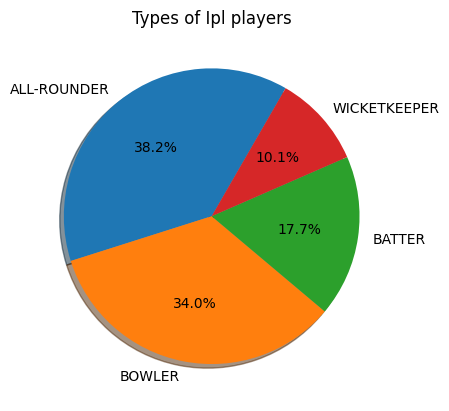

In [22]:
plt.pie(types.values,labels=types.index,autopct='%1.1f%%',shadow='True',startangle=60)
plt.title('Types of Ipl players')
plt.show()

<ipython-input-30-016dda5cdacd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig=sns.countplot(ipl['status'],palette=['Pink','Green'])


[]

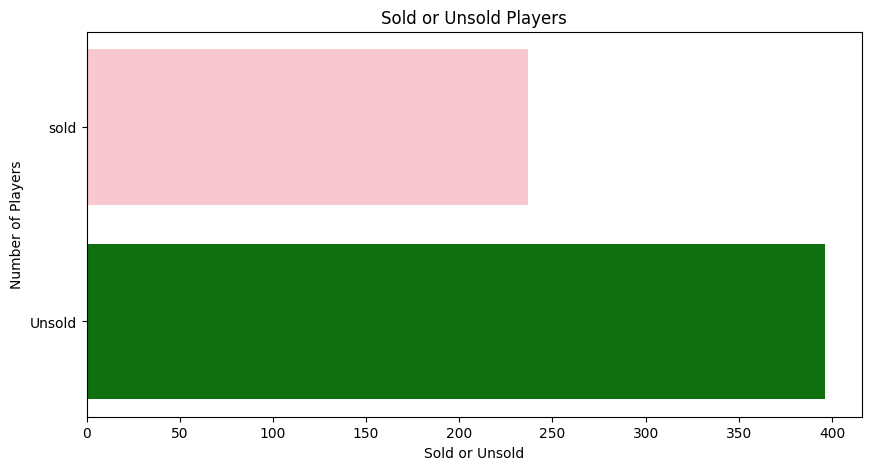

In [30]:
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl['status'],palette=['Pink','Green'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold or Unsold Players')
plt.plot()


In [32]:
ipl.groupby('status')['Player'].count()

,Player
status,
Unsold,396
sold,237


<ipython-input-49-0b2a9cc1df5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(ipl[ipl[ 'Team']!='Unsold'] [ 'Team' ],palette=['Grey','Yellow','Blue','Violet','Red','Purple','Blue','Green','Pink','Orange'])


[]

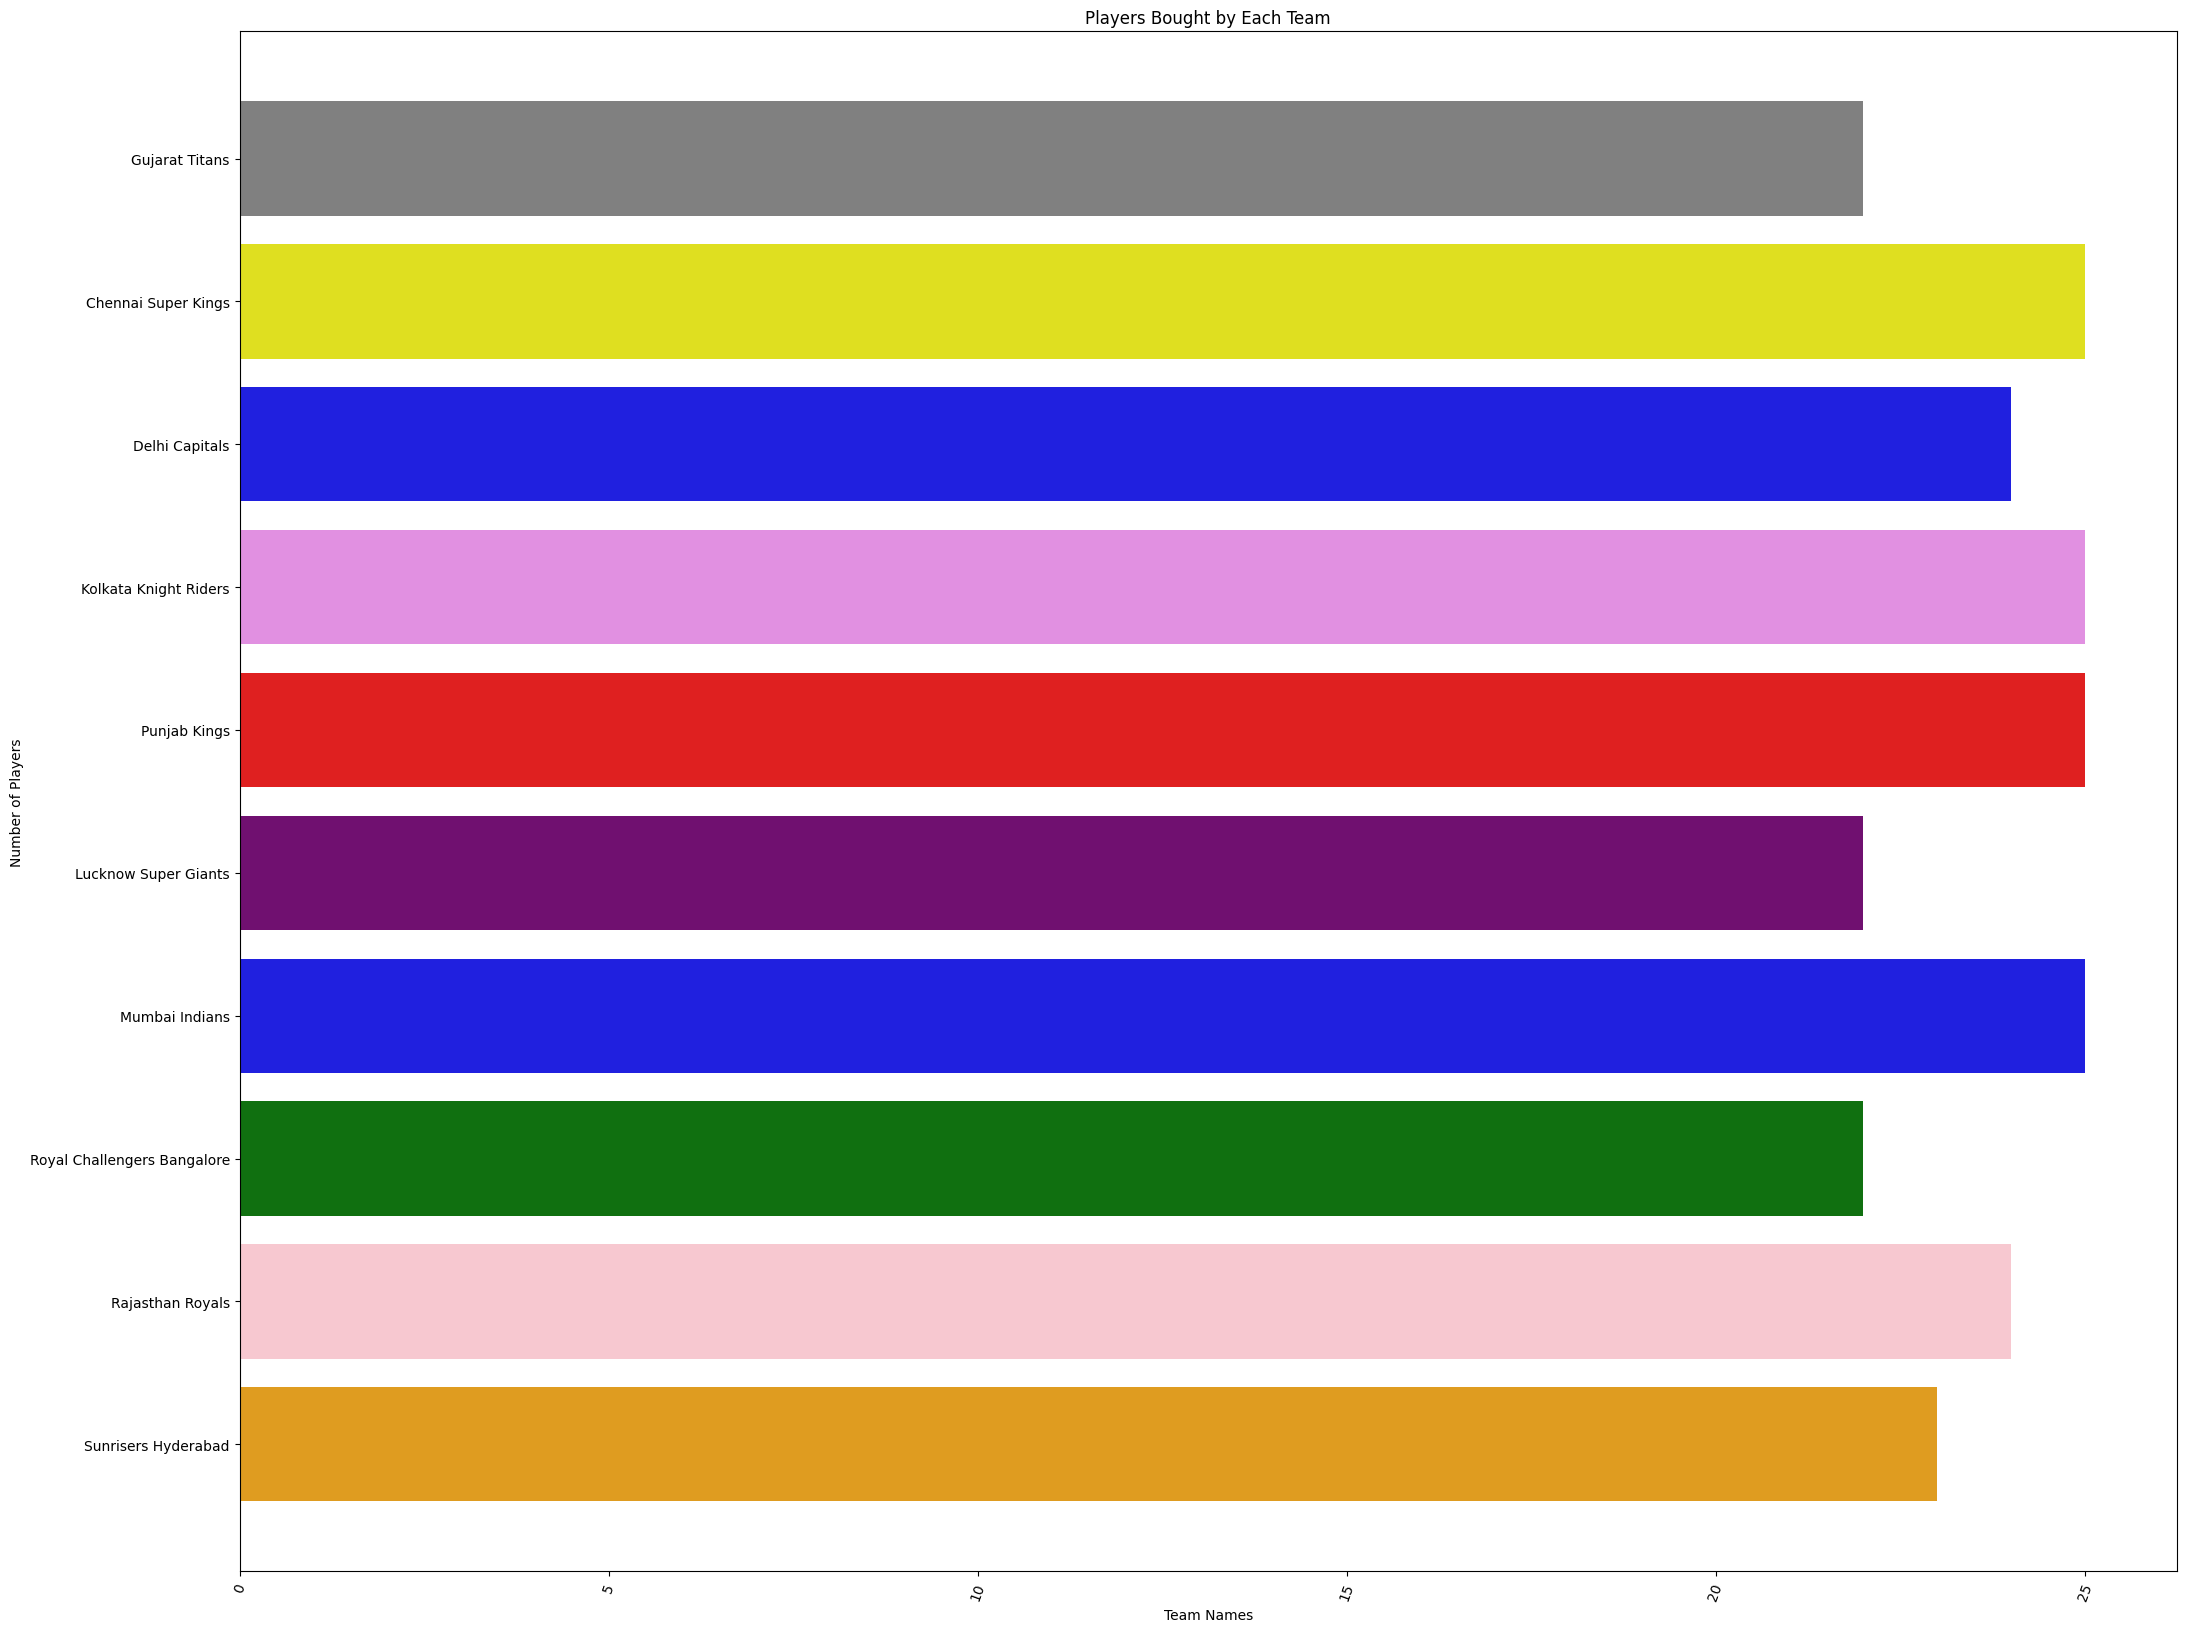

In [49]:
plt. figure(figsize=(25,20))
fig = sns.countplot(ipl[ipl[ 'Team']!='Unsold'] [ 'Team' ],palette=['Grey','Yellow','Blue','Violet','Red','Purple','Blue','Green','Pink','Orange'])
plt. xlabel ( 'Team Names')
plt.ylabel( 'Number of Players')
plt.title('Players Bought by Each Team', fontsize=12)
plt. xticks(rotation=70)
plt.plot()

In [53]:
ipl['retention'] = ipl['Base Price']
ipl['retention'].replace(['2 Cr','40 Lakh','1 Cr','75 Lakh','50 Lakh','30 Lakh','1.5 Cr'],'From Auction', inplace=True)
ipl[ 'Base Price']. replace('Draft Pick',0, inplace = True)
ipl['base_price_unit']= ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl[ 'base_price'] = ipl[ 'Base Price']. apply(lambda x: str(x).split(' ')[0])
ipl['base_price']. replace( 'Retained',0, inplace=True)
ipl



,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,0,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,0,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,Unsold,20 Lakh,Lakh,20
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold,20 Lakh,Lakh,20
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold,20 Lakh,Lakh,20
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,Unsold,20 Lakh,Lakh,20


In [54]:
ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          20 Lakh           9
                             From Auction     12
                             Retained          4
Delhi Capitals               20 Lakh           8
                             From Auction     12
                             Retained          4
Gujarat Titans               0                 3
                             20 Lakh           5
                             From Auction     14
Kolkata Knight Riders        20 Lakh           9
                             From Auction     12
                             Retained          4
Lucknow Super Giants         0                 3
                             20 Lakh           8
                             From Auction     11
Mumbai Indians               20 Lakh          11
                             From Auction     10
                             Retained          4
Punjab Kings                 20 Lakh          11
                             From Auction     12
                             Retained          2
Rajasthan Royals             20 Lakh           7
                             From Auction     14
                             Retained          3
Royal Challengers Bangalore  20 Lakh           6
                             From Auction     13
                             Retained          3
Sunrisers Hyderabad          20 Lakh           9
                             From Auction     11
                             Retained          3
Unsold                       20 Lakh         261
Name: retention, dtype: int64

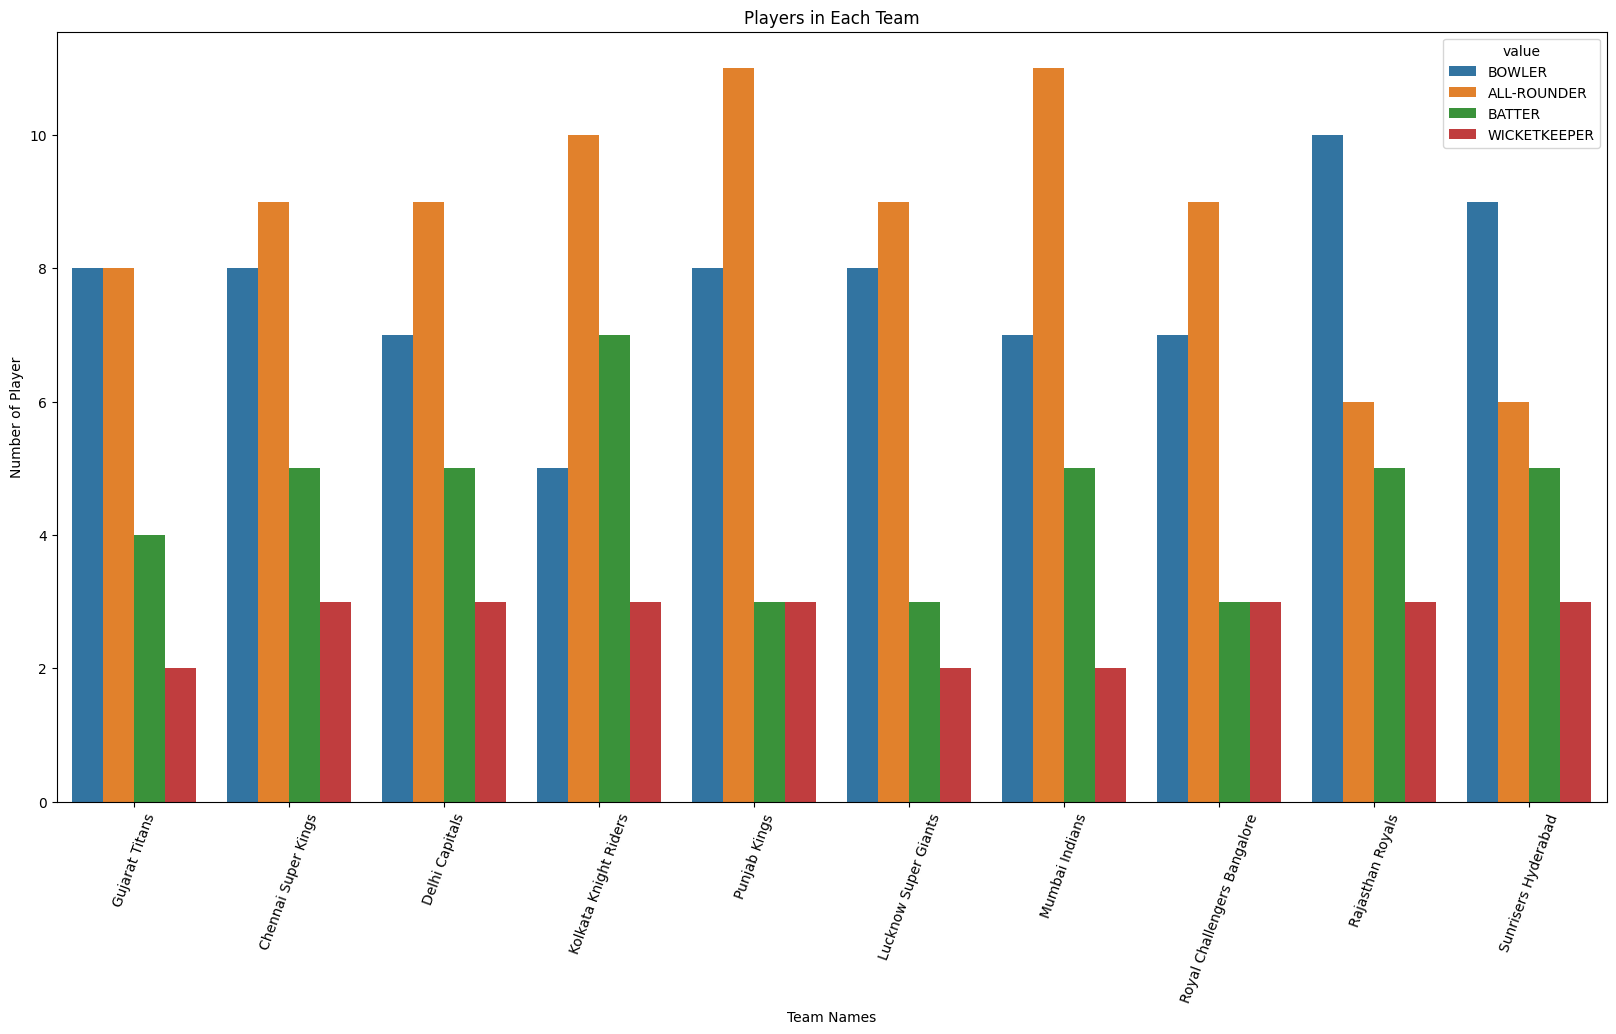

In [65]:
# Melt the DataFrame to convert it to long-form
ipl_long = pd.melt(ipl, id_vars=['Team'], value_vars=['TYPE'])

# Now use the long-form DataFrame for the countplot
plt.figure(figsize=(20,10))
fig = sns.countplot(data=ipl_long[ipl_long['Team']!='Unsold'], x='Team', hue='value')
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Player')
plt.xticks(rotation=70)
plt.show()

In [66]:
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

,COST IN ₹ (CR.)
Team,
Mumbai Indians,15.25
Chennai Super Kings,14.00
Kolkata Knight Riders,12.25
Punjab Kings,11.50
Delhi Capitals,10.75
Royal Challengers Bangalore,10.75
Sunrisers Hyderabad,10.75
Gujarat Titans,10.00
Rajasthan Royals,10.00


In [68]:
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)',ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,0
47,Rishabh Pant,Retained,WICKETKEEPER,16.0,2080.0,DC,Delhi Capitals,sold,Retained,Retained,0
143,Rohit Sharma,Retained,BATTER,16.0,2080.0,MI,Mumbai Indians,sold,Retained,Retained,0
168,Virat Kohli,Retained,BATTER,15.0,1950.0,RCB,Royal Challengers Bangalore,sold,Retained,Retained,0
214,Kane Williamson,Retained,BATTER,14.0,1820.0,SRH,Sunrisers Hyderabad,sold,Retained,Retained,0


In [78]:
ipl[(ipl['retention']=='From Auction')&(ipl['Team']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)',ascending=False)
# Changed 'oascending' to 'ascending'

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price


In [79]:
ipl=ipl.rename(columns={'2021 Squad':'Prev_team'})

In [81]:
unsold_players=ipl[(ipl.Prev_team!='Not Participated') & (ipl.Team == 'Unsold')][['Player','Prev_team']]
print(unsold_players)

                     Player Prev_team
237            Suresh Raina       CSK
238             Steve Smith        DC
239         Shakib Al Hasan       KKR
240             Amit Mishra        DC
241             Adil Rashid      PBKS
..                      ...       ...
628            Sairaj Patil       NaN
629              Monu Singh       NaN
630  Nivethan Radhakrishnan       NaN
631            Lance Morris       NaN
632            Aaron Hardie       NaN

[396 rows x 2 columns]
